# Unsupervised Learning

- I Gusti Ngurah Agung Hari Vijaya Kusuma
- Batch 57
- Hobi : Push Rank

---

Code Description
- MEMBER_NO-b : ID Member
- FFP_DATE : Frequent Flyer Program Join Date
- FIRST_FLIGHT_DATE : Tanggal Penerbangan pertama
- GENDER : Jenis Kelamin
- FFP_TIER : Tier dari Frequent Flyer Program
- WORK_CITY : Kota Asal
- WORK_PROVINCE : Provinsi Asal
- WORK_COUNTRY : Negara Asal
- AGE : Umur Customer
- LOAD_TIME : Tanggal data diambil
- FLIGHT_COUNT : Jumlah penerbangan Customer
- BP_SUM : Rencana Perjalanan
- SUM_YR_1 : Fare Revenue
- SUM_YR_2 : Votes Prices
- SEG_KM_SUM : Total jarak(km) penerbangan yg sudah dilakukan
- LAST_FLIGHT_DATE : Tanggal penerbangan terakhir
- LAST_TO_END : Jarak waktu penerbangan terakhir ke pesanan penerbangan paling akhir
- AVG_INTERVAL : Rata-rata jarak waktu
- MAX_INTERVAL : Maksimal jarak waktu
- EXCHANGE_COUNT : Jumlah penukaran
- avg_discount : Rata rata discount yang didapat customer
- Points_Sum : Jumlah poin yang didapat customer
- Point_NotFlight : point yang tidak digunakan oleh members

---

## 1. Lakukan EDA pada dataset untuk mendapatkan pemahaman<br>umum mengenai data dan memandu proses feature<br>engineering (20 poin)

Langkah-langkah:
<br>a. Pastikan setiap kolom dataset memiliki tipe data yang tepat, tidak ada data kosong,<br>
bebas dari duplikat, dan berada di range value yang tepat
<br>b. Keluarkan statistik kolom baik numerik maupun kategorikal, cari bentuk distribusi<br>
setiap kolom (numerik), dan jumlah baris untuk setiap unique value (kategorikal)
<br>c. Cari tahu apakah ada kolom-kolom yang berkorelasi kuat satu sama lain<br>
Untuk mempermudah kamu, yuk lihat resource di bawah ini:
● Topic Machine Learning Preparation - EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'flight.csv')

In [3]:
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [4]:
df['FLIGHT_COUNT'].unique()

array([210, 140, 135,  23, 152,  92, 101,  73,  56,  64,  43, 145,  29,
       118,  50,  22,  40,  38, 106,  94,  20,  44,  62, 213,  74,  87,
        53,  95, 131,  47,  25,  24,  54, 166,  81,  98,  35,  46,  21,
       110, 134, 107,  70, 189,  48,  68, 111,  69, 126,  55,  76,  77,
        84,  96,  30,  85,  32,  34, 197,  18, 149,  61,  36,  16, 102,
       127,  79,  97, 158,  51,  88,  42, 129,  67,  12, 100,  17,  90,
       146,  33, 142,  31,  71, 130,  89,  83,  99,  52,  65,  66,  27,
       193,  14,  57,  19, 108, 113, 109, 120,  45,  80,  82,  39, 125,
       116,  58, 180, 103,  13, 123,  49,  86,  60,  15,  59, 122,  72,
       124,  26, 136, 105,  11,  10, 114, 128, 112, 154,  37, 117,  93,
       137,  28, 132, 168, 115,  78, 104,  75, 119, 133, 139,  41,  63,
         7,   6,   9,  91,   8,   5, 174,   4,   3,   2])

## A. Pastikan setiap kolom dataset memiliki tipe data yang tepat, tidak ada data kosong,<br>bebas dari duplikat, dan berada di range value yang tepat

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [5]:
df.isnull().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

In [6]:
# cek persentase data nilai null terhadap keseluruhan data
print("Persentase data null:")
print(df.isnull().sum() / len(df)*100)

Persentase data null:
MEMBER_NO            0.000000
FFP_DATE             0.000000
FIRST_FLIGHT_DATE    0.000000
GENDER               0.004763
FFP_TIER             0.000000
WORK_CITY            3.602273
WORK_PROVINCE        5.156538
WORK_COUNTRY         0.041278
AGE                  0.666794
LOAD_TIME            0.000000
FLIGHT_COUNT         0.000000
BP_SUM               0.000000
SUM_YR_1             0.874770
SUM_YR_2             0.219089
SEG_KM_SUM           0.000000
LAST_FLIGHT_DATE     0.000000
LAST_TO_END          0.000000
AVG_INTERVAL         0.000000
MAX_INTERVAL         0.000000
EXCHANGE_COUNT       0.000000
avg_discount         0.000000
Points_Sum           0.000000
Point_NotFlight      0.000000
dtype: float64


In [7]:
# hapus nilai null pada dataframe
df = df.dropna()

print("Setelah menghapus nilai null:")
print(df.isnull().sum())

Setelah menghapus nilai null:
MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               0
FFP_TIER             0
WORK_CITY            0
WORK_PROVINCE        0
WORK_COUNTRY         0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64


In [8]:
# cek jumlah data duplikat
print("Jumlah data duplikat:", df.duplicated().sum())

Jumlah data duplikat: 0


In [9]:
Kolom_bertipe_data_salah = ["FFP_DATE", "FIRST_FLIGHT_DATE", "LOAD_TIME", "LAST_FLIGHT_DATE"]

# ubah tipe data kolom yang salah
for col in Kolom_bertipe_data_salah:
    df[col] = pd.to_datetime(df[col], errors='coerce')


In [10]:
print("Tipe data kolom setelah perubahan:")
print(df.dtypes)

Tipe data kolom setelah perubahan:
MEMBER_NO                     int64
FFP_DATE             datetime64[ns]
FIRST_FLIGHT_DATE    datetime64[ns]
GENDER                       object
FFP_TIER                      int64
WORK_CITY                    object
WORK_PROVINCE                object
WORK_COUNTRY                 object
AGE                         float64
LOAD_TIME            datetime64[ns]
FLIGHT_COUNT                  int64
BP_SUM                        int64
SUM_YR_1                    float64
SUM_YR_2                    float64
SEG_KM_SUM                    int64
LAST_FLIGHT_DATE     datetime64[ns]
LAST_TO_END                   int64
AVG_INTERVAL                float64
MAX_INTERVAL                  int64
EXCHANGE_COUNT                int64
avg_discount                float64
Points_Sum                    int64
Point_NotFlight               int64
dtype: object


In [11]:
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,2006-11-02,2008-12-24,Male,6,.,beijing,CN,31.0,2014-03-31,...,234188.0,580717,2014-03-31,1,3.483254,18,34,0.961639,619760,50
2,55106,2007-02-01,2007-08-30,Male,6,.,beijing,CN,40.0,2014-03-31,...,164982.0,283712,2014-03-21,11,5.298507,18,20,1.254676,406361,26
3,21189,2008-08-22,2008-08-23,Male,5,Los Angeles,CA,US,64.0,2014-03-31,...,125500.0,281336,2013-12-26,97,27.863636,73,11,1.090870,372204,12
4,39546,2009-04-10,2009-04-15,Male,6,guiyang,guizhou,CN,48.0,2014-03-31,...,130702.0,309928,2014-03-27,5,4.788079,47,27,0.970658,338813,39
5,56972,2008-02-10,2009-09-29,Male,6,guangzhou,guangdong,CN,64.0,2014-03-31,...,76946.0,294585,2014-01-13,79,7.043956,52,10,0.967692,343121,15


In [32]:
# simpan dataframe yang sudah dibersihkan ke file CSV
df.to_csv('flight_cleaned.csv', index=False)

In [12]:
# kelompokan fitur kategorikal dan numerikal serta datetime
fitur_kategorikal = df.select_dtypes(include=['object']).columns.tolist()
fitur_numerikal = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
fitur_datetime = df.select_dtypes(include=['datetime64[ns]']).columns.tolist()

## B. Keluarkan statistik kolom baik numerik maupun kategorikal, cari bentuk distribusi<br>setiap kolom (numerik), dan jumlah baris untuk setiap unique value (kategorikal)

In [13]:
df[fitur_numerikal].describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,58255.000000,58255.000000,58255.000000,58255.000000,58255.000000,58255.000000,58255.000000,58255.000000,58255.000000,58255.000000,58255.000000,58255.000000,58255.000000,58255.000000,58255.000000
mean,31545.754854,4.104849,42.228736,12.067634,11066.303682,5366.827963,5694.530650,17353.000910,171.255309,67.937285,167.349206,0.328384,0.720627,12742.648820,2.820548
std,18187.496028,0.378182,9.761965,14.236472,16283.209178,8103.595049,8710.724917,20969.886756,180.560120,77.449058,122.890446,1.148485,0.183895,20606.104272,7.500252
min,3.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15787.500000,4.000000,35.000000,3.000000,2608.000000,1016.000000,846.000000,4904.000000,28.000000,23.700000,81.000000,0.000000,0.612155,2872.500000,0.000000
50%,31603.000000,4.000000,41.000000,7.000000,5832.000000,2808.000000,2846.000000,10237.000000,104.000000,44.833333,144.000000,0.000000,0.711468,6487.000000,0.000000
75%,47315.500000,4.000000,48.000000,15.000000,13022.000000,6591.500000,6958.000000,21571.500000,258.000000,82.000000,228.000000,0.000000,0.808159,14527.000000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.000000,140.000000


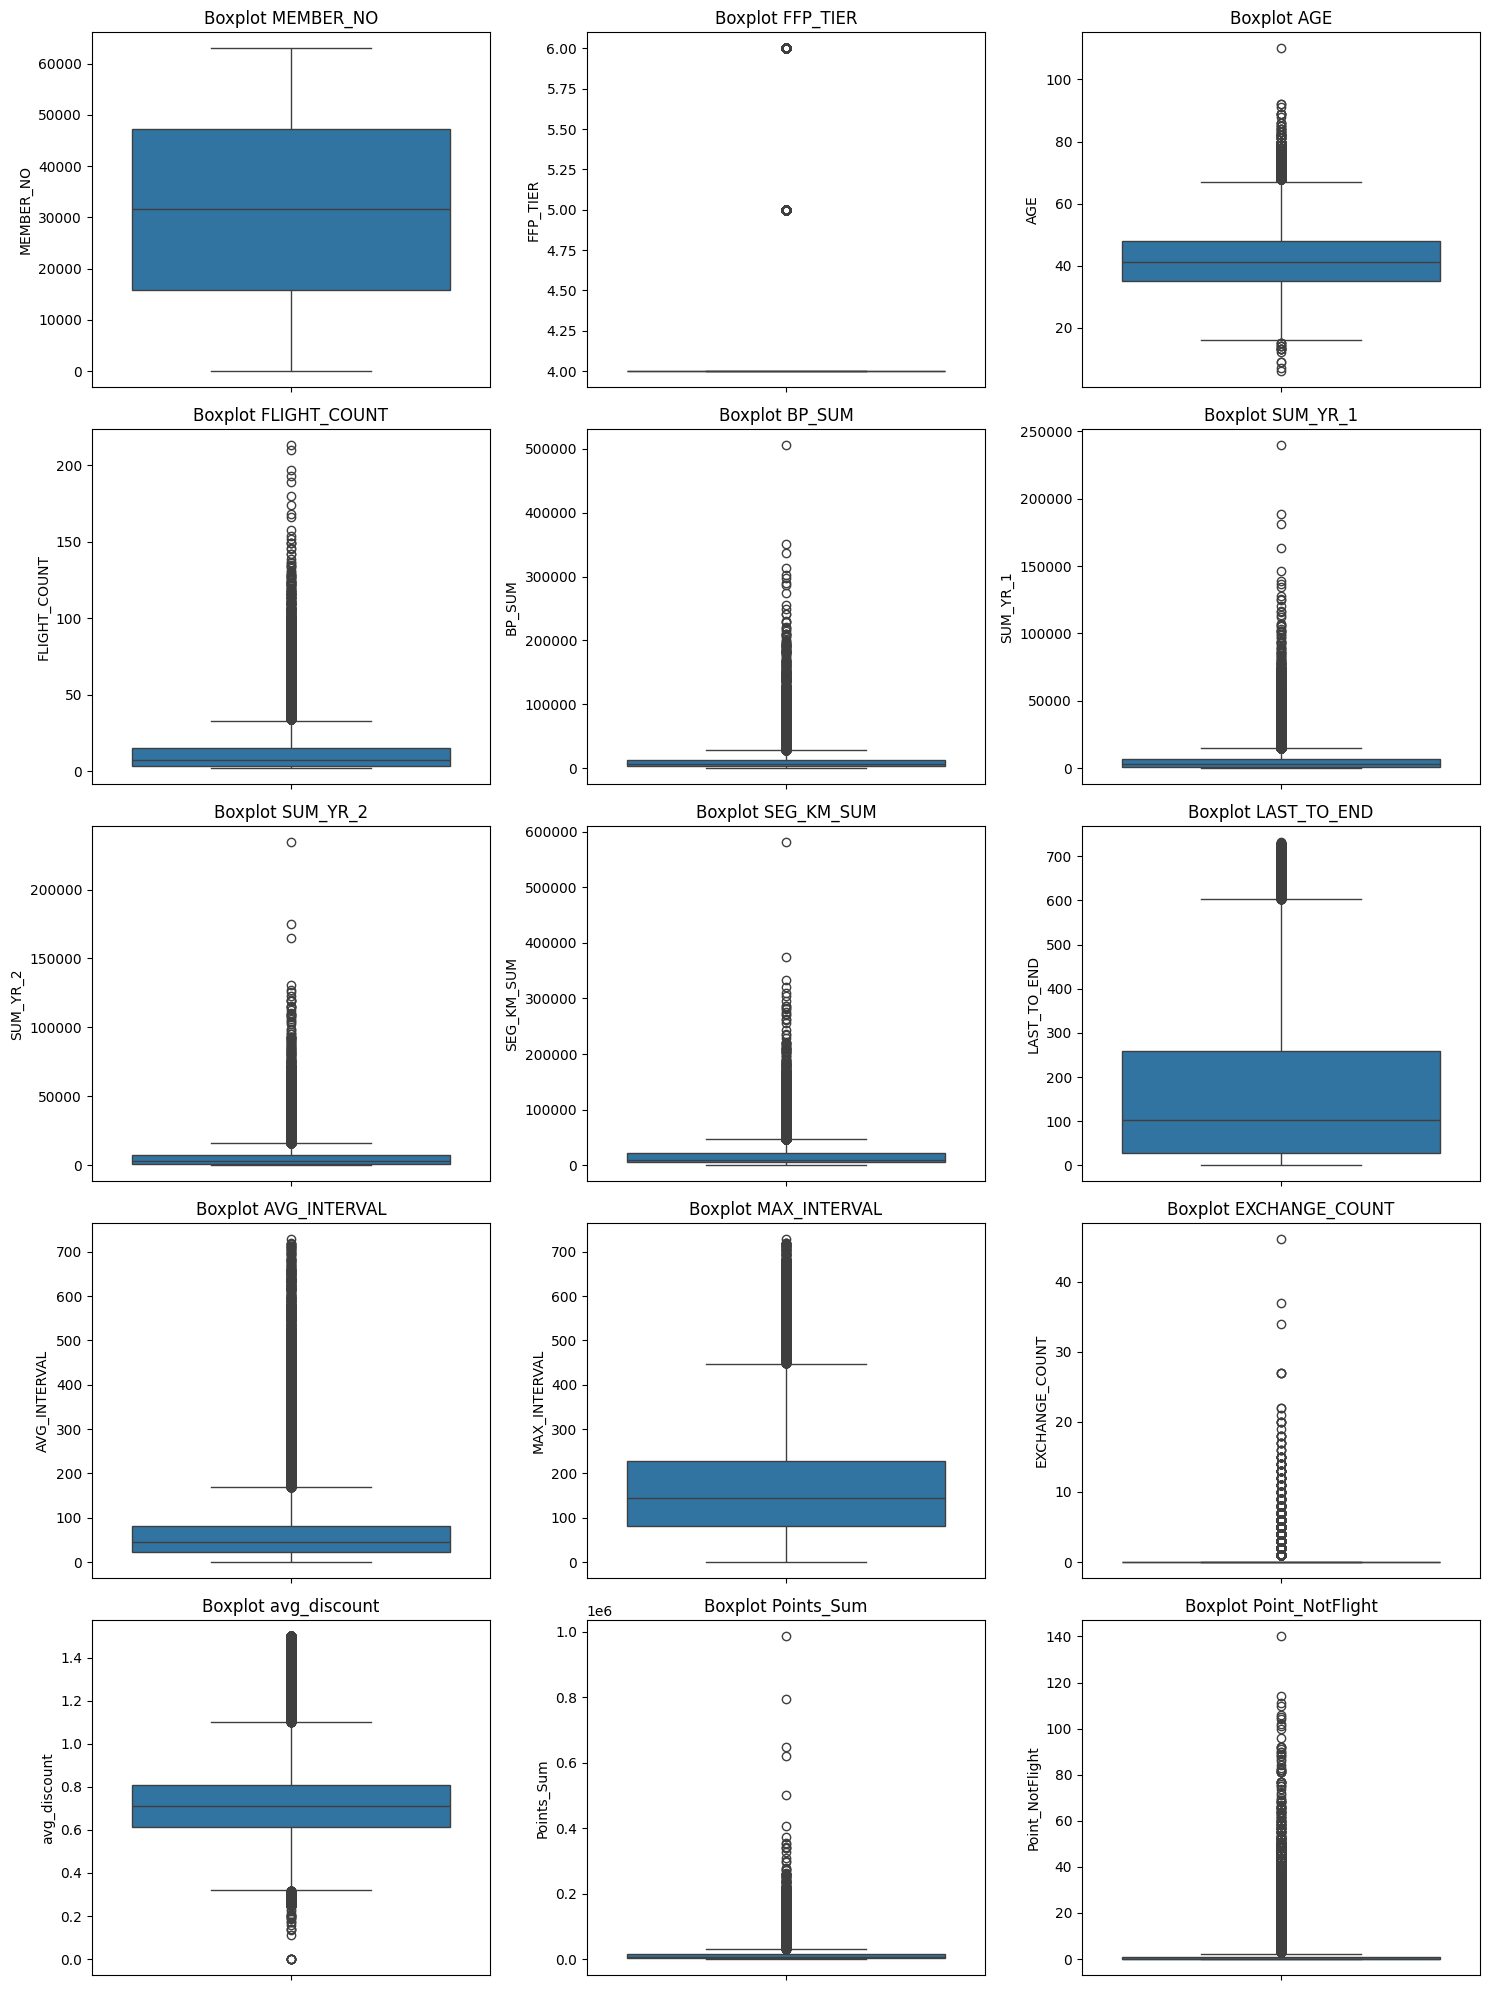

In [14]:
import math
n_cols = 3
n_rows = math.ceil(len(fitur_numerikal) / n_cols)

plt.figure(figsize=(5*n_cols, 4*n_rows))

for i, col in enumerate(fitur_numerikal, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=df[col])   # kalau tanpa label target, cukup y=col
    plt.title(f'Boxplot {col}')

plt.tight_layout()
plt.show()

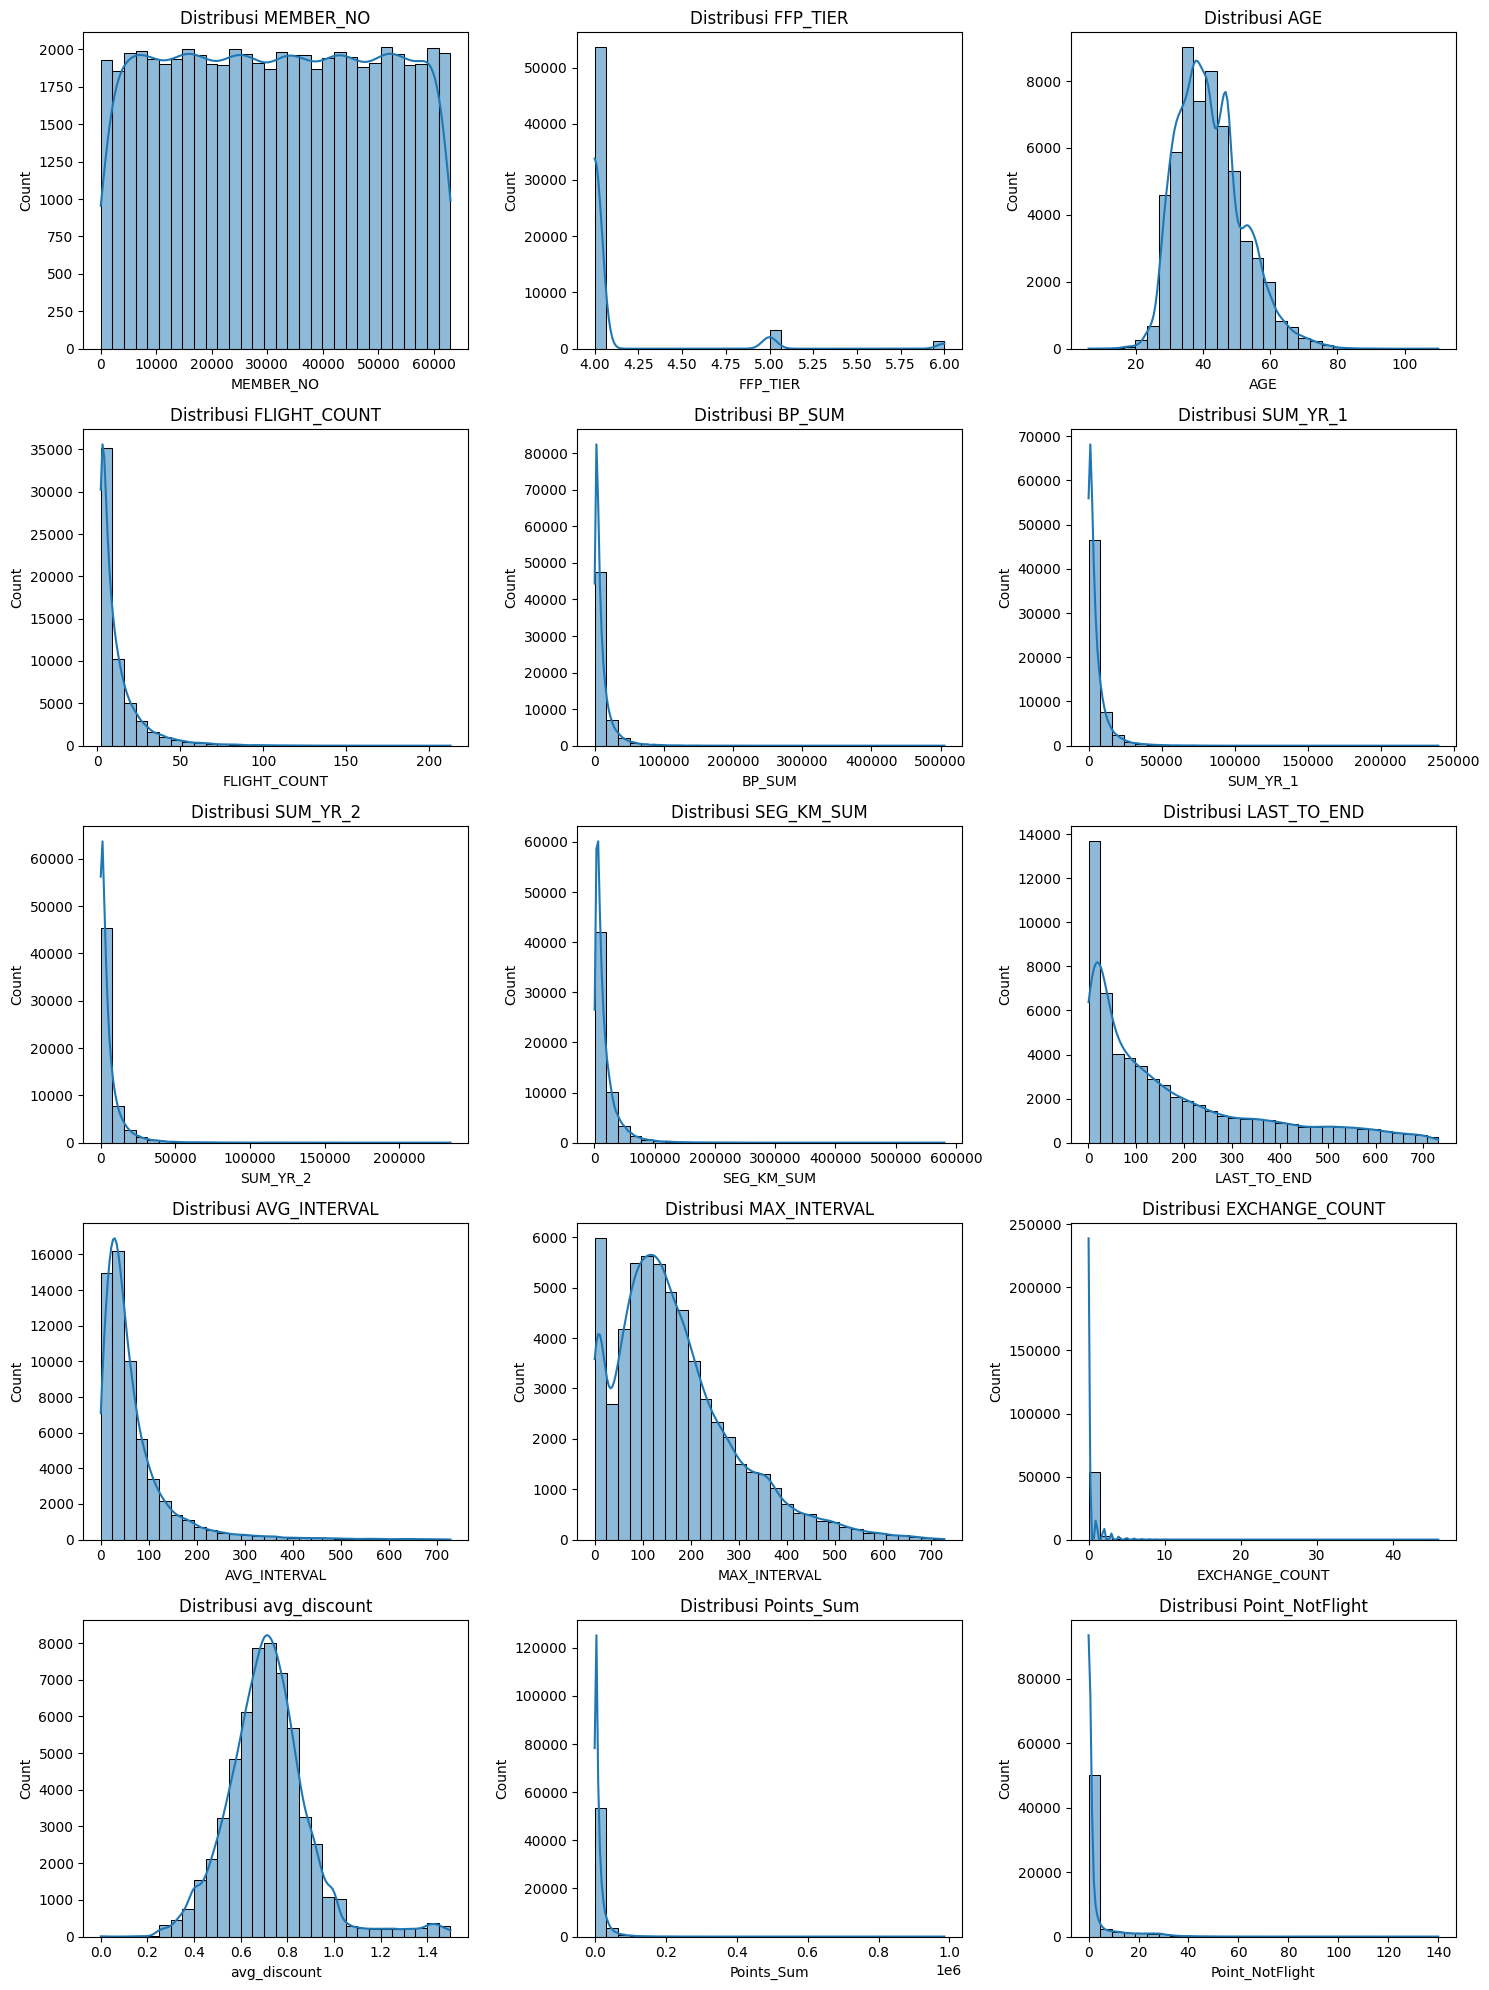

In [15]:
# jumlah baris & kolom subplot
n_cols = 3
n_rows = math.ceil(len(fitur_numerikal) / n_cols)

plt.figure(figsize=(5*n_cols, 4*n_rows))

for i, col in enumerate(fitur_numerikal, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], kde=True, bins=30)   # histogram + KDE
    plt.title(f'Distribusi {col}')

plt.tight_layout()
plt.show()

In [16]:
df[fitur_kategorikal].columns

Index(['GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY'], dtype='object')

In [17]:
df[fitur_kategorikal].nunique()

GENDER              2
WORK_CITY        2944
WORK_PROVINCE    1127
WORK_COUNTRY      105
dtype: int64

## C. Cari tahu apakah ada kolom-kolom yang berkorelasi kuat satu sama lain<br>

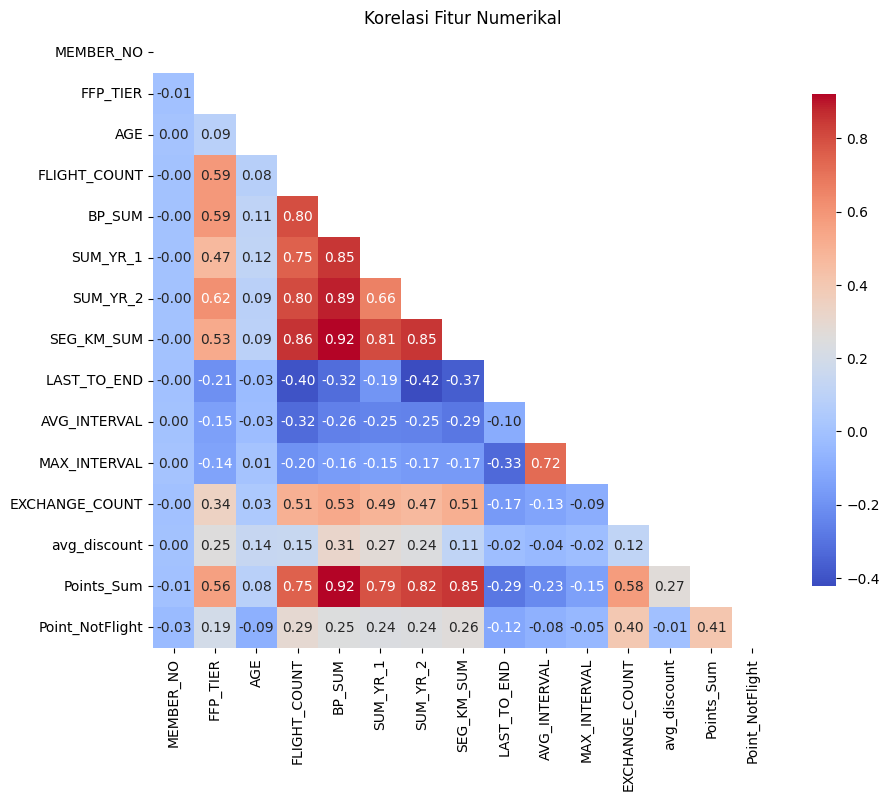

In [18]:
corr = df[fitur_numerikal].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# cek korelasi untuk fitur numerikal
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={"shrink": .8})
plt.title('Korelasi Fitur Numerikal')
plt.show()



Beberapa fitur numerik memiliki korelasi kuat antara satu dan lainnya sehingga perlu untuk di drop

In [19]:
df[fitur_kategorikal].head()

,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY
0,Male,.,beijing,CN
2,Male,.,beijing,CN
3,Male,Los Angeles,CA,US
4,Male,guiyang,guizhou,CN
5,Male,guangzhou,guangdong,CN


Kolom kategorikal yang memiliki informasi geografis juga perlu di drop, karena buat apa kita melakukan clustering menggunakan unsupervised learning jika kita ingin membuat cluster berdasarkan lokasi geografis. Kalau mau berdasarkan lokasi geografis, tinggal pd grouby saja. Gender juga akan di drop karena baik laki laki atau perempuan tidak akan mempengaruhi cluster yang terbentuk

## Menggali Insight

### `Seberapa loyal member berdasarkan tier FFP?`

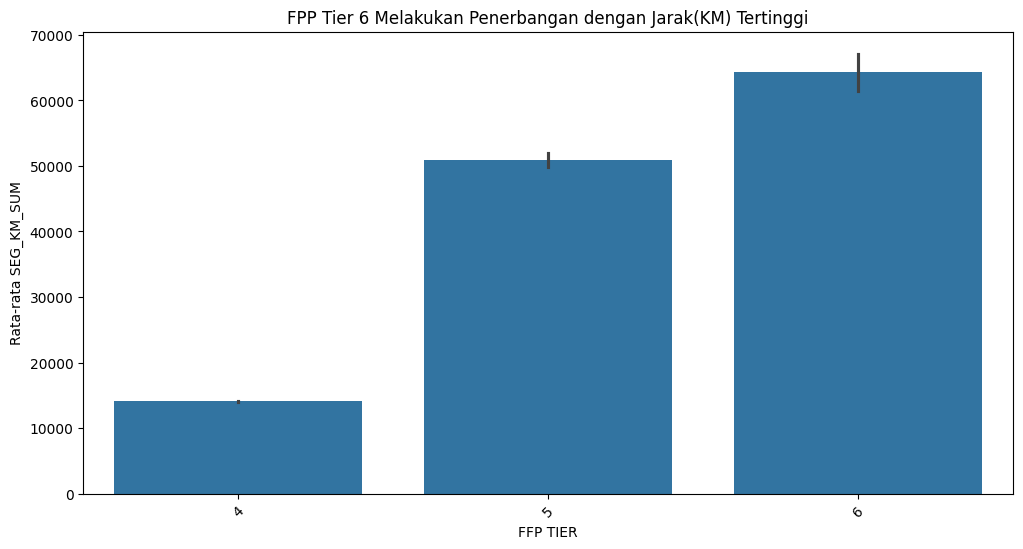

In [20]:
# Seberapa loyal member berdasarkan tier FFP ?
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='FFP_TIER', y='SEG_KM_SUM', estimator=np.mean)
plt.title('FPP Tier 6 Melakukan Penerbangan dengan Jarak(KM) Tertinggi')
plt.xlabel('FFP TIER')
plt.ylabel('Rata-rata SEG_KM_SUM')
plt.xticks(rotation=45)
plt.show()


### `Apakah umur berpengaruh terhadap frekuensi terbang?`

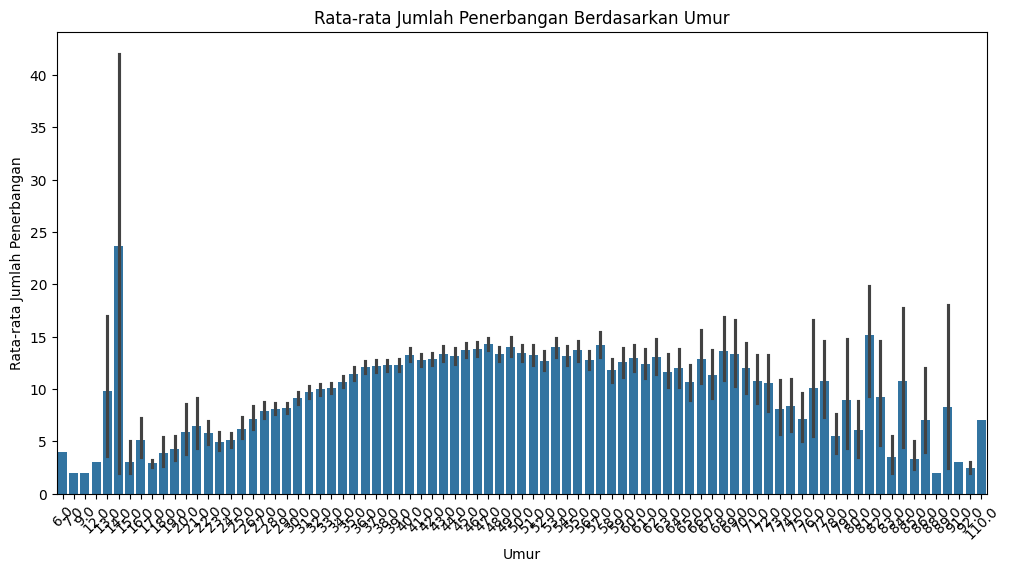

In [21]:
# Apakah umur berpengaruh terhadap frekuensi terbang?
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='AGE', y='FLIGHT_COUNT')
plt.title('Rata-rata Jumlah Penerbangan Berdasarkan Umur')
plt.xlabel('Umur')
plt.ylabel('Rata-rata Jumlah Penerbangan')
plt.xticks(rotation=45)
plt.show()

### `Apakah pelanggan dengan EXCHANGE_COUNT tinggi adalah mereka yang juga paling sering terbang?`

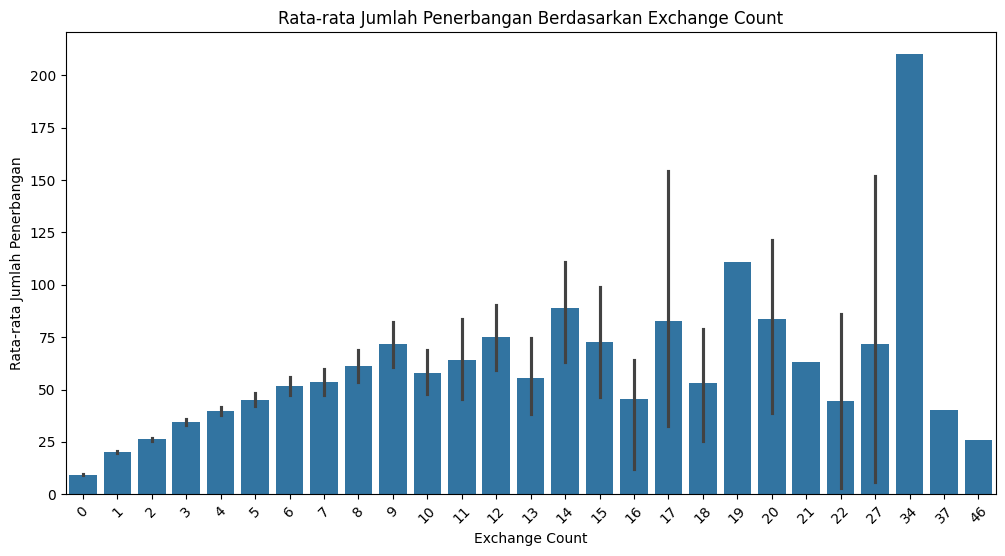

In [29]:
# Apakah pelanggan dengan EXCHANGE_COUNT tinggi adalah mereka yang juga paling sering terbang?
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='EXCHANGE_COUNT', y='FLIGHT_COUNT')
plt.title('Rata-rata Jumlah Penerbangan Berdasarkan Exchange Count')
plt.xlabel('Exchange Count')
plt.ylabel('Rata-rata Jumlah Penerbangan')
plt.xticks(rotation=45)
plt.show()

In [26]:
df['avg_discount'].head(10)

0     0.961639
2     1.254676
3     1.090870
4     0.970658
5     0.967692
6     0.965347
7     0.962070
9     0.708010
10    0.988658
11    0.952535
Name: avg_discount, dtype: float64

In [31]:
df['LAST_TO_END'].head()

0     1
2    11
3    97
4     5
5    79
Name: LAST_TO_END, dtype: int64

In [34]:
df['AVG_INTERVAL'].head(10)

0      3.483254
2      5.298507
3     27.863636
4      4.788079
5      7.043956
6      7.190000
7     10.111111
9     11.333333
10    16.833333
11     5.027778
Name: AVG_INTERVAL, dtype: float64

## Feature selection
